In [63]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np 
from pathlib import Path 

%matplotlib inline

In [64]:
# Load CSV file
brewery_data_csv = Path("breweries_complete.csv")

In [65]:
# Read data file and store it in DataFrame
breweries_complete = pd.read_csv(brewery_data_csv, skipinitialspace=True)
breweries_complete.head()

,name,brewery_type,address_1,city,state_province,postal_code,longitude,latitude,state,zip_code,brewery_id
0,(405) Brewing Co,micro,1716 Topeka St,Norman,Oklahoma,73069-8224,-97.468182,35.257389,Oklahoma,73069,1
1,10 Barrel Brewing Co,large,1501 E St,San Diego,California,92101-6618,-117.129593,32.714813,California,92101,3
2,10 Barrel Brewing Co,large,62970 18th St,Bend,Oregon,97701-9847,-121.281706,44.086835,Oregon,97701,4
3,10 Barrel Brewing Co,large,1135 NW Galveston Ave Ste B,Bend,Oregon,97703-2465,-121.328802,44.057565,Oregon,97703,5
4,10 Barrel Brewing Co,large,1411 NW Flanders St,Portland,Oregon,97209-2620,-122.685506,45.525979,Oregon,97209,6


## Total breweries across all types per state

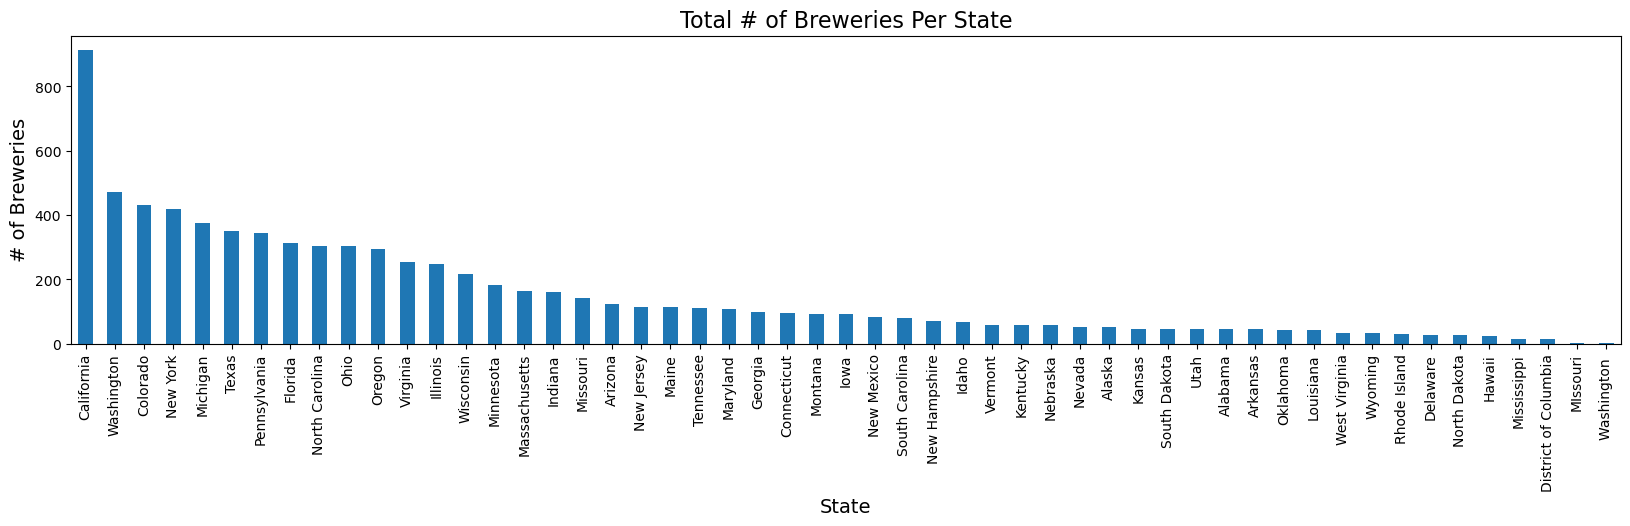

In [66]:
# Generate a bar plot showing total number of breweries by state 
brew_by_state = breweries_complete.groupby(["state"])["brewery_type"].count()
brew_by_state = brew_by_state.sort_values(ascending=False)
brew_by_state_df = pd.DataFrame(brew_by_state)

# Display bar plot, label x and y, apply formatting 
brew_chart = brew_by_state_df.plot(kind="bar", figsize=(20,4), legend=False)
brew_chart.set_title("Total # of Breweries Per State", fontsize=16)
brew_chart.set_xlabel("State", fontsize=14)
brew_chart.set_ylabel("# of Breweries", fontsize=14)

# Save an image of the chart and print it to the screen
plt.savefig("Images/breweries_per_state.png", bbox_inches="tight")
plt.show()

## Total "open"-type breweries per state

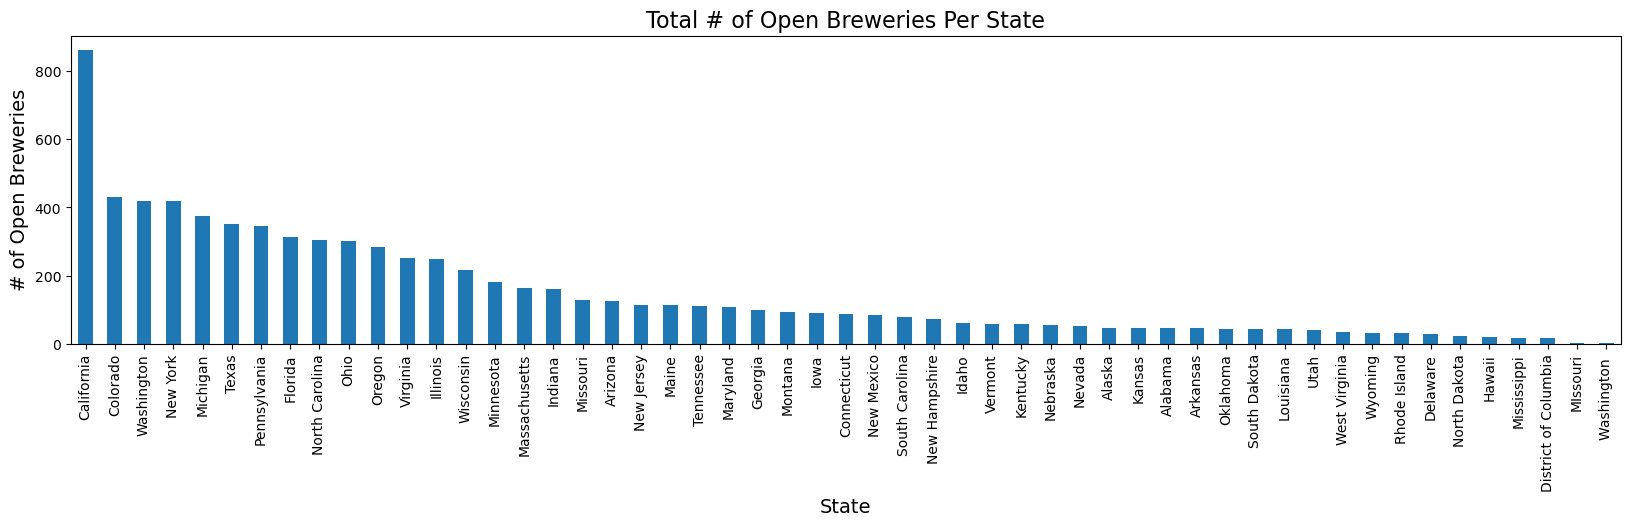

In [67]:
# Remove data of closed breweries 
open_breweries = breweries_complete[breweries_complete.brewery_type != "closed"]

# Generate a bar plot showing total number of open breweries by state 
open_brew_by_state = open_breweries.groupby(["state"])["brewery_type"].count()
open_brew_by_state = open_brew_by_state.sort_values(ascending=False)
open_breweries_df = pd.DataFrame(open_brew_by_state)

# Display bar plot, label x and y, apply formatting 
open_brew_chart = open_breweries_df.plot(kind="bar", figsize=(20,4), legend=False)
open_brew_chart.set_title("Total # of Open Breweries Per State", fontsize=16)
open_brew_chart.set_xlabel("State", fontsize=14)
open_brew_chart.set_ylabel("# of Open Breweries", fontsize=14)

# Save an image of the chart and print it to the screen
plt.savefig("Images/open_breweries_per_state.png", bbox_inches="tight")
plt.show()

## Total closed breweries per state

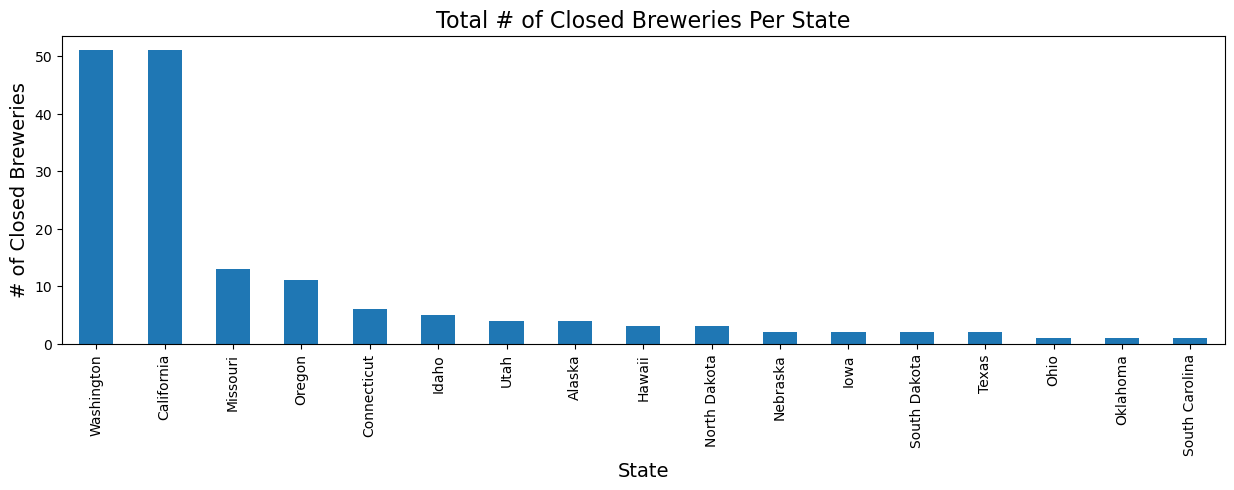

In [68]:
# Pull data for closed breweries 
closed_breweries = breweries_complete.loc[breweries_complete["brewery_type"] == "closed"]

# Generate a bar plot showing total number of closed breweries by state 
closed_brew_by_state = closed_breweries.groupby(["state"])["brewery_type"].count()
closed_brew_by_state = closed_brew_by_state.sort_values(ascending=False)
closed_breweries_df = pd.DataFrame(closed_brew_by_state)

# Display bar plot, label x and y, apply formatting 
closed_brew_chart = closed_breweries_df.plot(kind="bar", figsize=(15,4), legend=False)
closed_brew_chart.set_title("Total # of Closed Breweries Per State", fontsize=16)
closed_brew_chart.set_xlabel("State", fontsize=14)
closed_brew_chart.set_ylabel("# of Closed Breweries", fontsize=14)

# Save an image of the chart and print it to the screen
plt.savefig("Images/closed_breweries_per_state.png", bbox_inches="tight")
plt.show()

## Total planned breweries per state

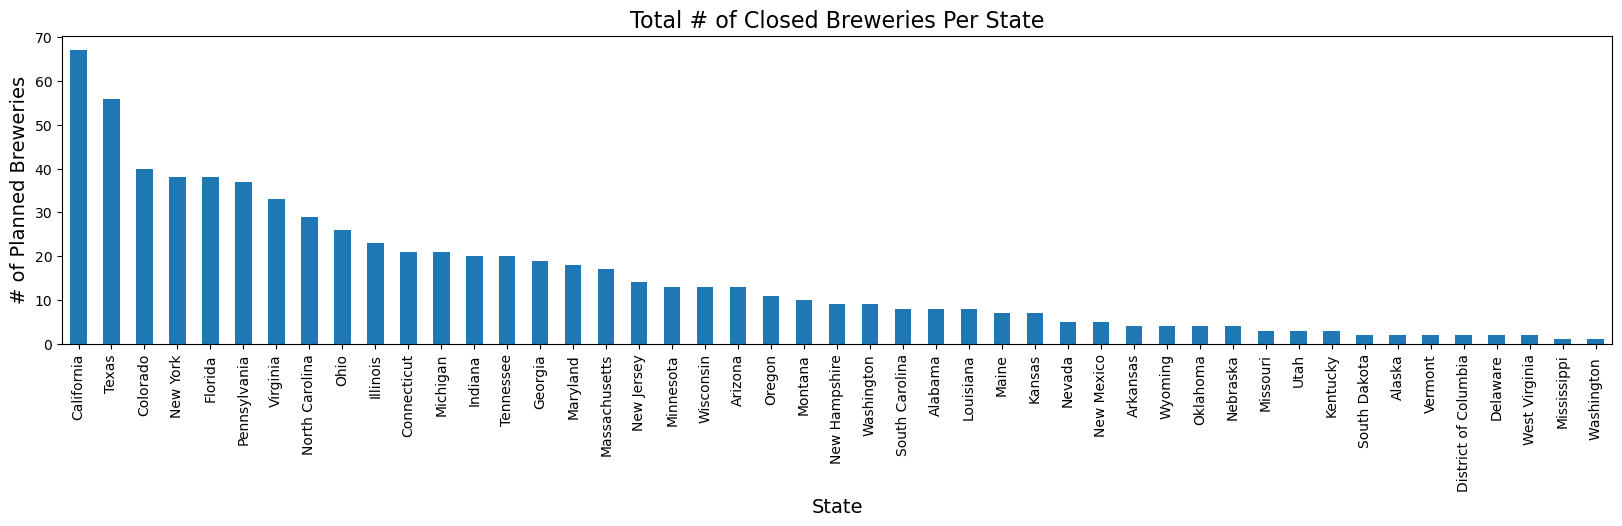

In [69]:
# Pull data for planned breweries
planned_breweries = breweries_complete.loc[breweries_complete["brewery_type"] == "planning"]

# Generate a bar plot showing total number of closed breweries by state 
planned_brew_by_state = planned_breweries.groupby(["state"])["brewery_type"].count()
planned_brew_by_state = planned_brew_by_state.sort_values(ascending=False)
planned_breweries_df = pd.DataFrame(planned_brew_by_state)

# Display bar plot, label x and y, apply formatting 
planned_brew_chart = planned_breweries_df.plot(kind="bar", figsize=(20,4), legend=False)
planned_brew_chart.set_title("Total # of Closed Breweries Per State", fontsize=16)
planned_brew_chart.set_xlabel("State", fontsize=14)
planned_brew_chart.set_ylabel("# of Planned Breweries", fontsize=14)

# Save an image of the chart and print it to the screen
plt.savefig("Images/planned_breweries_per_state.png", bbox_inches="tight")
plt.show()

## Stacked bar plot of brewery-types (no closed) per state

In [70]:
# Identify number of closed breweries in comparison to other types 
breweries_complete["brewery_type"].value_counts()

micro         4114
brewpub       2395
planning       702
regional       213
contract       196
closed         162
large           74
proprietor      69
nano             5
bar              2
Name: brewery_type, dtype: int64

In [71]:
# Drop closed breweries from dataset 
open_planned_breweries = breweries_complete[breweries_complete.brewery_type != "closed"]

# Output csv of only open or planned breweries  
open_planned_breweries.to_csv("breweries_open_planned.csv", index=False)
open_planned_breweries

,name,brewery_type,address_1,city,state_province,postal_code,longitude,latitude,state,zip_code,brewery_id
0,(405) Brewing Co,micro,1716 Topeka St,Norman,Oklahoma,73069-8224,-97.468182,35.257389,Oklahoma,73069,1
1,10 Barrel Brewing Co,large,1501 E St,San Diego,California,92101-6618,-117.129593,32.714813,California,92101,3
2,10 Barrel Brewing Co,large,62970 18th St,Bend,Oregon,97701-9847,-121.281706,44.086835,Oregon,97701,4
3,10 Barrel Brewing Co,large,1135 NW Galveston Ave Ste B,Bend,Oregon,97703-2465,-121.328802,44.057565,Oregon,97703,5
4,10 Barrel Brewing Co,large,1411 NW Flanders St,Portland,Oregon,97209-2620,-122.685506,45.525979,Oregon,97209,6
...,...,...,...,...,...,...,...,...,...,...,...
7927,Zebulon Artisan Ales,micro,8 Merchents Alley,Weaverville,North Carolina,28787-8860,-82.554475,35.715670,North Carolina,28787,7914
7928,Zephyr Brewing Co,micro,1609 E 58th Ave Ste G,Denver,Colorado,80216-1528,-104.981909,39.779835,Colorado,80216,7916
7929,Zero Gravity Craft Brewery,micro,716 Pinte Street,Burlington,Vermont,05401,-73.211024,44.474836,Vermont,05401,7918
7930,Zum Bier,micro,3232 E Monroe St,Waukegan,Illinois,60085,-87.861975,42.358933,Illinois,60085,7930


In [72]:
# Using code from team member Natalia Lopez 
open_planned_by_state = open_planned_breweries.groupby(["state", "brewery_type"])["brewery_type"].count()
open_planned_by_state

state    brewery_type
Alabama  brewpub          4
         contract         1
         micro           32
         planning         8
Alaska   brewpub         14
                         ..
Wyoming  brewpub         12
         contract         1
         micro           14
         planning         4
         regional         1
Name: brewery_type, Length: 283, dtype: int64

In [77]:
open_planned_by_state_index = open_planned_by_state.index
open_planned_by_state_index

MultiIndex([(  'Alabama',    'brewpub'),
            (  'Alabama',   'contract'),
            (  'Alabama',      'micro'),
            (  'Alabama',   'planning'),
            (   'Alaska',    'brewpub'),
            (   'Alaska',   'contract'),
            (   'Alaska',      'micro'),
            (   'Alaska',   'planning'),
            (   'Alaska',   'regional'),
            (  'Arizona',    'brewpub'),
            ...
            ('Wisconsin',      'micro'),
            ('Wisconsin',       'nano'),
            ('Wisconsin',   'planning'),
            ('Wisconsin', 'proprietor'),
            ('Wisconsin',   'regional'),
            (  'Wyoming',    'brewpub'),
            (  'Wyoming',   'contract'),
            (  'Wyoming',      'micro'),
            (  'Wyoming',   'planning'),
            (  'Wyoming',   'regional')],
           names=['state', 'brewery_type'], length=283)

In [102]:
open_planned_by_state_index2 = open_planned_by_state.unstack()
open_planned_by_state_index2

brewery_type,bar,brewpub,contract,large,micro,nano,planning,proprietor,regional
state,,,,,,,,,
Alabama,NaN,4.0,1.0,NaN,32.0,NaN,8.0,NaN,NaN
Alaska,NaN,14.0,1.0,NaN,29.0,NaN,2.0,NaN,1.0
Arizona,NaN,46.0,4.0,2.0,58.0,NaN,13.0,NaN,1.0
Arkansas,NaN,18.0,1.0,NaN,22.0,NaN,4.0,NaN,NaN
California,NaN,249.0,27.0,15.0,461.0,NaN,67.0,13.0,29.0
Colorado,NaN,138.0,9.0,7.0,222.0,NaN,40.0,4.0,11.0
Connecticut,NaN,11.0,5.0,NaN,49.0,NaN,21.0,NaN,2.0
Delaware,NaN,14.0,NaN,1.0,10.0,NaN,2.0,NaN,1.0
District of Columbia,NaN,6.0,2.0,NaN,5.0,NaN,2.0,NaN,1.0


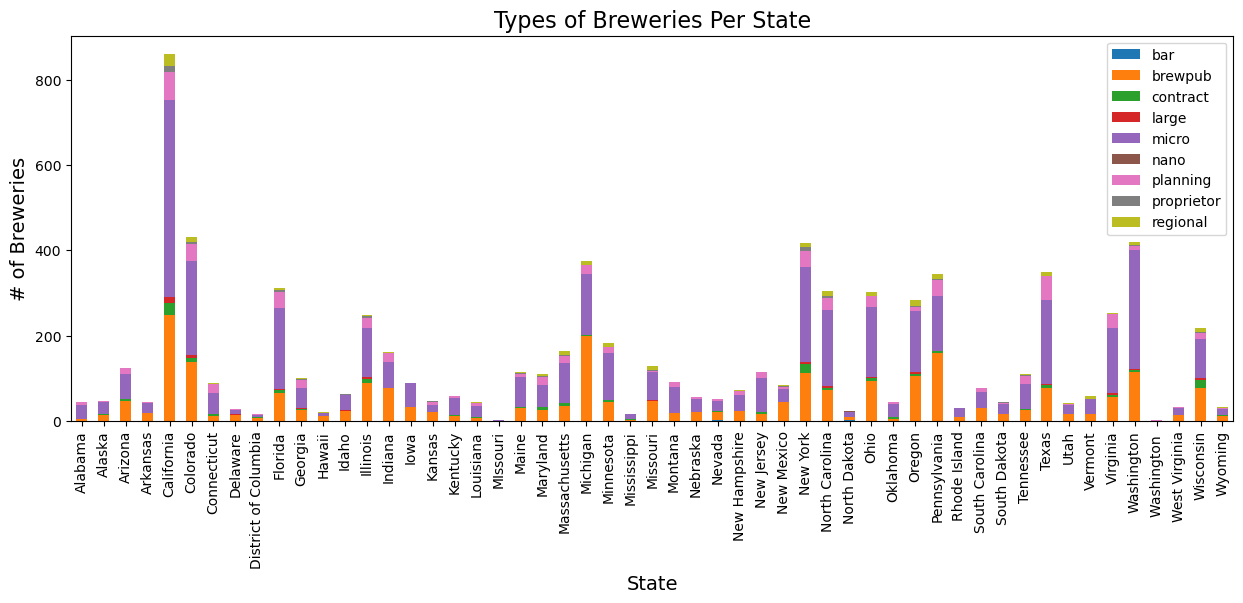

In [103]:
# Display bar plot, label x and y, apply formatting 
stacked_chart = open_planned_by_state_index2.plot(kind="bar", stacked=True, figsize=(15,5))
stacked_chart.set_title("Types of Breweries Per State", fontsize=16)
stacked_chart.set_xlabel("State", fontsize=14)
stacked_chart.set_ylabel("# of Breweries", fontsize=14)
plt.legend(bbox_to_anchor=(1.0, 1.0))

# Save an image of the chart and print it to the screen
plt.savefig("Images/breweries_types_per_state.png", bbox_inches="tight")
plt.show()

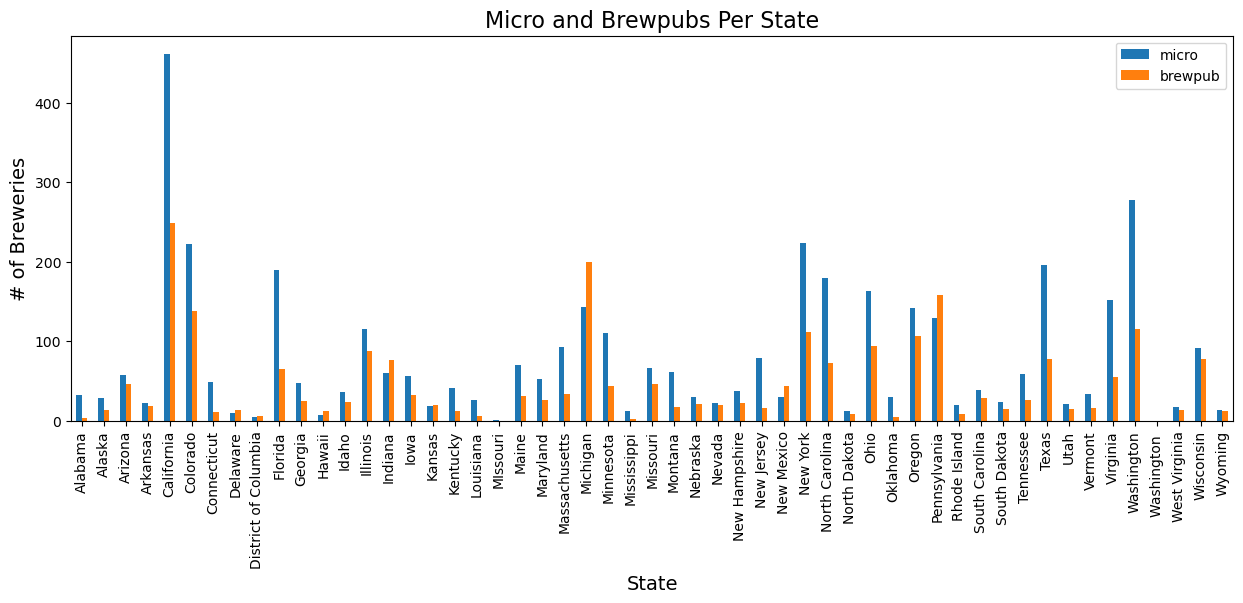

In [121]:
# new DataFrame with only micro and brewpub columns 
micro_brewpub = open_planned_by_state_index2[["micro", "brewpub"]]

# Display bar plot, label x and y, apply formatting 
micro_brewpub_chart = micro_brewpub.plot(kind="bar", figsize=(15,5))
micro_brewpub_chart.set_title("Micro and Brewpubs Per State", fontsize=16)
micro_brewpub_chart.set_xlabel("State", fontsize=14)
micro_brewpub_chart.set_ylabel("# of Breweries", fontsize=14)
plt.legend(bbox_to_anchor=(1.0, 1.0))

# Save an image of the chart and print it to the screen
plt.savefig("Images/micro_brewpubs_per_state.png", bbox_inches="tight")
plt.show()

In [123]:
top_states = micro_brewpub.sort_values(["micro"], ascending=False)
top_states

brewery_type,micro,brewpub
state,,
California,461.0,249.0
Washington,278.0,115.0
New York,224.0,111.0
Colorado,222.0,138.0
Texas,196.0,77.0
Florida,190.0,65.0
North Carolina,179.0,72.0
Ohio,163.0,94.0
Virginia,152.0,55.0


In [ ]:
# new DataFrame with only micro and brewpub columns 
micro_brewpub = open_planned_by_state_index2[["micro", "brewpub"]]

In [95]:
#table_df = pd.read_csv("breweries_open_planned.csv", skipinitialspace=True)
#table_df["value"]=1
#pivot_table = table_df.pivot_table(index=["state"], columns=["brewery_type"], fill_value=0, aggfunc="sum") 
#pivot_table

In [ ]:
# Output list of breweries with closed ones removed 
# open_planned_breweries.to_csv("breweries_open_planned.csv", index=False)

In [ ]:
# Load CSV file
# open_planned_brewery_data_csv = Path("breweries_open_planned.csv")

In [ ]:
# Read data file and store it in DataFrame
# open_planned_brew_data = pd.read_csv(open_planned_brewery_data_csv)
# open_planned_brew_data

In [ ]:
# Loop through rows of open_planned brewery data to confirm removal of 162 closed breweries 
#rowcount  = 0
# iterating through the whole file
#for row in open("breweries_open_planned.csv"):
  #rowcount+= 1
# printing the result
#print("Number of rows:", rowcount -1)

In [96]:
#open_planned_df = open_planned_brew_data[open_planned_brew_data.columns[~open_planned_brew_data.columns.isin(["name", "address_1", "city", "state_province", "postal_code", "longitude", "latitude", "zip_code", "brewery_id"])]]

# Output list of breweries with closed ones removed 
#open_planned_df.to_csv("breweries_open_planned_by_state.csv", index=False)
#open_planned_df

In [ ]:
#live_brew_df = pd.DataFrame(open_planned_breweries)
#live_brew_reset = live_brew_df.reset_index()
#live_brew_reset

In [97]:
#table_df = pd.read_csv("breweries_open_planned_by_state.csv", skipinitialspace=True)
#table_df["value"]=1
#pivot_table = table_df.pivot_table(index=["state"], columns=["brewery_type"], fill_value=0, aggfunc="sum")
#margins=True, margins_name="Total"

#pivot_table = table_df.pivot_table(index=["state"], columns=["brewery_type"], values=["value"], fill_value=0, aggfunc=lambda x: ' '.join(str(v) for v in x))
#pivot_table

In [ ]:
# pivot_table.sort_values(by=["Total"], axis=1, ascending=False)


In [ ]:
#bar_plot_data = pivot_table.groupby(["state"])["brewery_type"].count()
#bar_plot_data = pivot_table.sort_values(by=["values"], ascending=False)
#bar_plot_df = pd.DataFrame(bar_plot_data)

# Display bar plot, label x and y, apply formatting 
#stacked_bar_plot = pivot_table.plot(kind="bar", figsize=(20,7), stacked=True)
#stacked_bar_plot.set_xlabel("State", fontsize=18)
#stacked_bar_plot.set_ylabel("# of Planned Breweries", fontsize=18)

In [ ]:
#pivot_table = pivot_table.sort_values(ascending=False)
# stacked_bar_plot = pivot_table.plot(kind="bar", stacked=True)
#plt.title("Types of Breweries Per State")
#plt.xlabel("States")
#plt.ylabel("Total # of Breweries by Type")


In [ ]:
#table_df = pd.read_csv("breweries_open_planned_by_state.csv")
#pivot_table = table_df.pivot_table(index=["state"], columns=["brewery_type"], values=["brewery_type"], aggfunc=lambda x: ' '.join(str(v) for v in x))
#pivot_table

In [ ]:
#table = pd.pivot_table(open_planned_df, values="brewery_type", index="", columns="brewery_types", aggfunc=np.sum)

In [ ]:
#micro_brew = open_planned_brew_data.iloc["brewery_type" == "micro"]

In [ ]:
#micro_brew = open_planned_brew_data.groupby(["brewery_type"])["state_province"].value_counts()